<a href="https://colab.research.google.com/github/ManJ-PC/Natural-Language-Processing/blob/main/bertscore_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERTScore

BERTScore's evaluation architecture is designed to evaluate the quality of generated text by
comparing it to a reference text. The architecture is built around several key components:

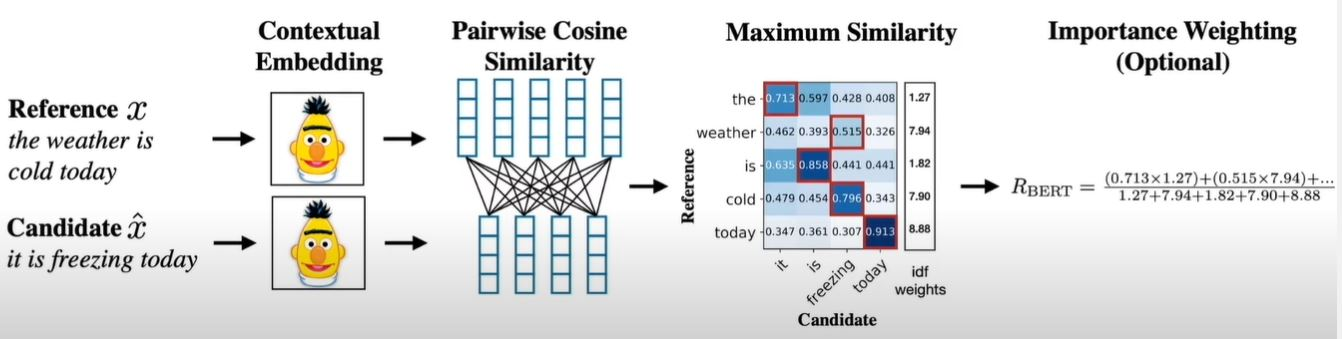
* Token Representation: BERTScore uses pre-trained BERT embeddings to represent tokens (words or subwords) in the text. These embeddings capture the semantic meaning of the tokens in their context 1.

* Cosine Similarity: After obtaining the embeddings, BERTScore calculates the cosine similarity between the embeddings of the tokens in the generated text and the reference text. This gives a measure of how semantically similar the generated text is to the reference text 1.

* Precision, Recall, and F1 Score: Each token in the reference sentence is matched to the most similar token in the generated sentence, and vice versa. This process is used to calculate the precision, recall, and F1 score, which are measures of the quality of the generated text 1.

* Importance Weighting (Optional): This is an optional step in the BERTScore architecture. It assigns different weights to different tokens based on their importance. Tokens that are more likely to be important in the context of the text receive higher weights 1.

* Baseline Rescaling: This is another optional step. It adjusts the BERTScore values to make them more human-readable. This is done by rescaling the scores with baseline scores 3.

In [2]:
# Install the package
!pip install bert-score

In [3]:

# Import the necessary libraries
from bert_score import BERTScorer

# Initialize the BERTScorer object
scorer = BERTScorer(lang='en')

# Define the reference and candidate sentences
reference = ["This is a test sentence"]
candidate = ["This is a test sentence"]

# Compute the BERTScore
P, R, F1 = scorer.score(candidate, reference)

# Print the scores
print("Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(P.item(), R.item(), F1.item()))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 1.00, Recall: 1.00, F1: 1.00


In [4]:
# Define the reference and candidate sentences
reference = ["The cat sat on the mat."]
candidate = ["A cat is sitting on a mat."]

# Compute the BERTScore
P, R, F1 = scorer.score(candidate, reference)

# Print the scores
print("Precision: {:.2f}, Recall: {:.2f}, F1: {:.2f}".format(P.item(), R.item(), F1.item()))

Precision: 0.95, Recall: 0.96, F1: 0.96


In [ ]:
# install pytorch and huggingface transformers if you havn't done so
# !pip install torch==1.5.1
# !pip install transformers==3.0.1

In [ ]:
# if you have not installed bert_score, it is very easy
# simply uncomment the line below to install through pip
# !pip install bert_score==0.3.4

We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [5]:
from bert_score import score

In [6]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

Cloning into 'bert_score'...
remote: Enumerating objects: 997, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 997 (delta 276), reused 247 (delta 247), pack-reused 612 (from 1)
Receiving objects: 100% (997/997), 1.33 MiB | 18.63 MiB/s, done.
Resolving deltas: 100% (555/555), done.


Inputs to `score` are a list of candidate sentences and a list of reference sentences.

In [7]:
with open("bert_score/example/hyps.txt") as f:
    cands = [line.strip() for line in f]

with open("bert_score/example/refs.txt") as f:
    refs = [line.strip() for line in f]

Let's have a look.

In [8]:
cands[0]

'28-year-old chef found dead in San Francisco mall'

We are now ready to call the score function. Besides candidates and references, we need to speicify the bert model we are using. Since we are dealing with English sentences, we will use the default English model, which is *roberta-large* model.

In [9]:
# When you are running this cell for the first time,
# it will download the BERT model which will take relatively longer.
P, R, F1 = score(cands, refs, lang="en", verbose=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.26 seconds, 38.53 sentences/sec


The outputs of the `score` function are Tensors of precision, recall, and F1 respectively. Each Tensor has the same number of items with the candidate and reference lists. Each item in the list is a scalar, representing the score for the corresponding candidates and references.

In [10]:
F1

tensor([0.9834, 0.9782, 0.9162, 0.9589, 0.9675, 0.9680, 0.9602, 0.9663, 0.9438,
        0.9508])

We can take the average of all candidate reference pairs to be the system level score.

In [11]:
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.959


It might also be very interestig to see the distribution of BERTScore.

In [12]:
import matplotlib.pyplot as plt

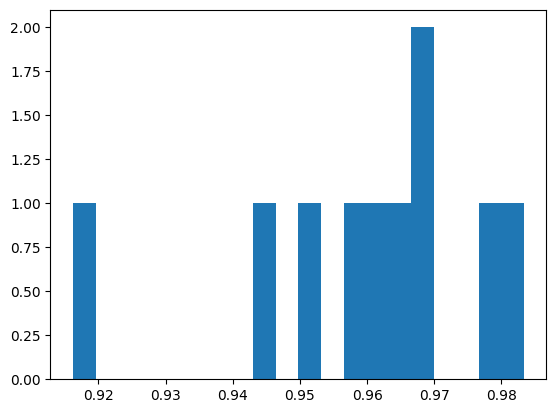

In [16]:
plt.hist(F1, bins=20)
plt.show()

`bert_score` also provides a convenient function `plot_example` to support sentence-level visualization by plotting th e pairwise cosine similarity. Note that here we have not applied the idf weighting.

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


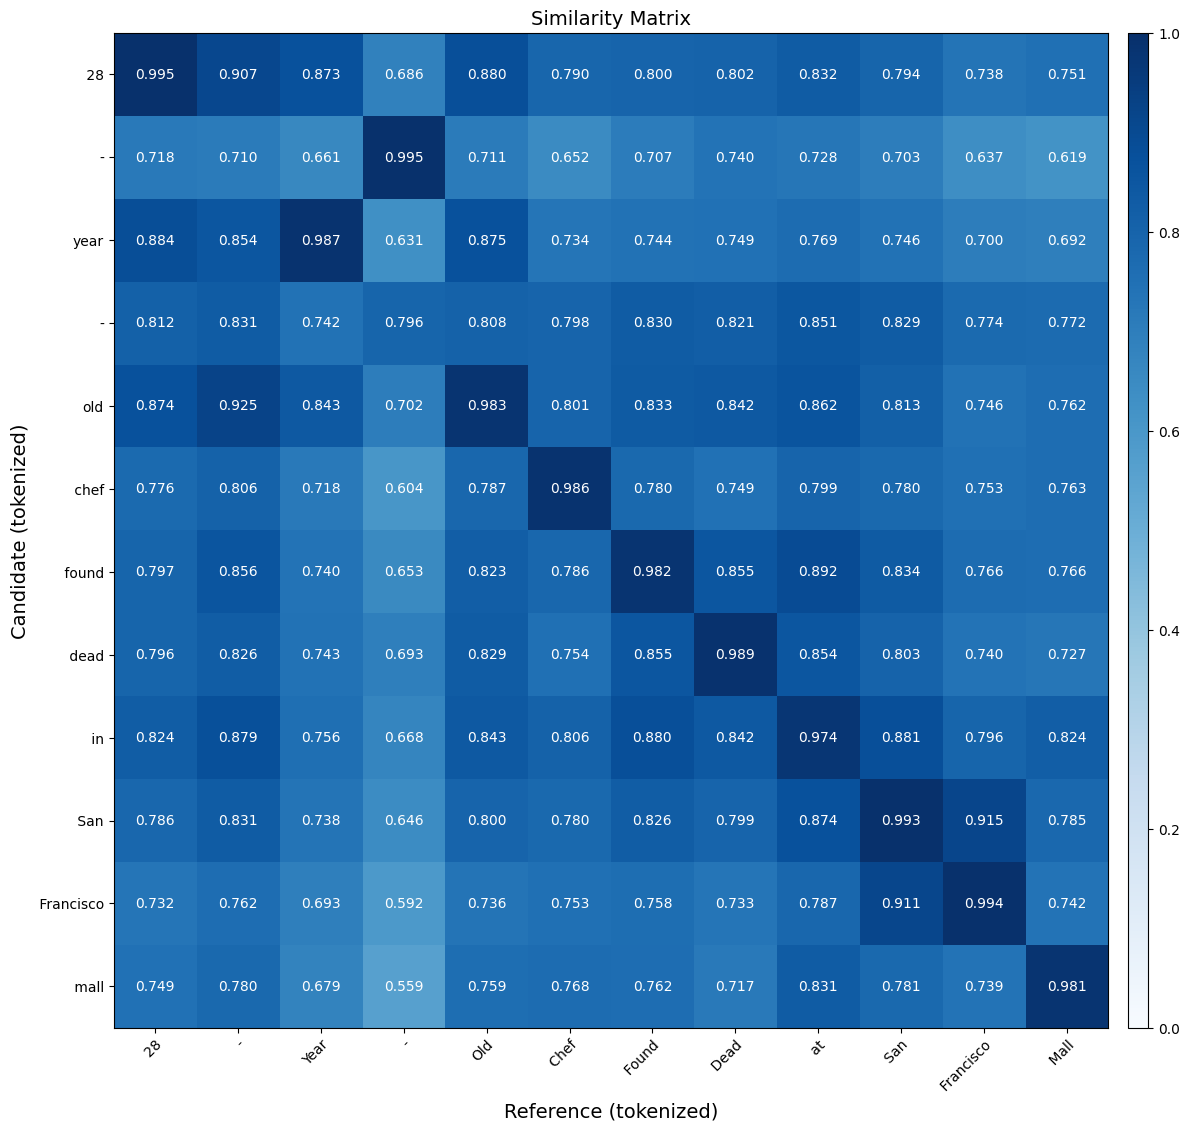

In [17]:
from bert_score import plot_example

cand = cands[0]
ref = refs[0]
plot_example(cand, ref, lang="en")